In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import math
import os
from scipy import stats

try:
#     plt.style.use('belle2')
    plt.style.use('belle2_serif')
#     plt.style.use('belle2_modern')
except OSError:
    print("Please install belle2 matplotlib style")   
px = 1/plt.rcParams['figure.dpi']

from main.data_tools.extract_ntuples import get_pd, get_np
from main.draw_tools.decorations import b2helix, watermark
from main.draw_tools.stacking_with_error_bars import MC_stack_plot, MC_stack_plot_density

from main.data_tools.error_bars import make_data_weight
from main.data_tools.query_dataframes import cut_dfs_7types

Welcome to JupyROOT 6.26/04


In [2]:
# Specify the path of the directory you want to list
directory_path = '/home/belle2/jaeyoung/storage_ghi/Ntuples_ghi_2/MC15ri_generic'
directory_path = '/media/jykim/T7_2/storage/Ntuples_ghi_2/MC15ri_generic'

# Use os.listdir() to get a list of all the files and directories in the specified directory
directories = [d for d in os.listdir(directory_path) if os.path.isdir(os.path.join(directory_path, d))]

print("List of directories:")
for directory in directories:
    print(directory)

List of directories:
MC15ri_etaetapip_pre_sel_240310_treefit
MC15ri_etaetapip_tight_v1_240405_treefit_BCS
MC15ri_etaetapip_tight_v1_240405_treefit_BCS_etaconst
MC15ri_etaetapip_tight_v1_240405_treefit_BCS_etapi0const


In [3]:
# base_file_loc = '/home/belle2/jaeyoung/storage_ghi/Ntuples_ghi_2/MC15ri_generic/MC15ri_etaetapip_pre_cut_240228/'
# base_file_loc = '/home/belle2/jaeyoung/storage_ghi/Ntuples_ghi_2/MC15ri_generic/MC15ri_etaetapip_pre_sel_240306/'
base_file_loc = '/home/belle2/jaeyoung/storage_ghi/Ntuples_ghi_2/MC15ri_generic/MC15ri_etaetapip_pre_sel_240307_treefit/'
base_file_loc = '/media/jykim/T7_2/storage/Ntuples_ghi_2/MC15ri_generic/MC15ri_etaetapip_pre_sel_240310_treefit/'
base_file_loc = '/media/jykim/T7_2/storage/Ntuples_ghi_2/MC15ri_generic/MC15ri_etaetapip_tight_v1_240405_treefit_BCS_etapi0const/'


In [4]:
generic_ccbar = base_file_loc + 'ccbar/*.root'
# phigamma_ccbar = base_file_loc + 'topo/generic_ccbar.root'
# phigamma_ccbar = base_file_loc + 'topo/resultfile/result_phi/standard.root'

generic_uubar = base_file_loc + 'uubar/*.root'
generic_ddbar = base_file_loc + 'ddbar/*.root'
generic_ssbar = base_file_loc + 'ssbar/*.root'
generic_charged = base_file_loc + 'charged/*.root'
generic_mixed = base_file_loc + 'mixed/*.root'
generic_taupair = base_file_loc + 'taupair/*.root'

In [5]:
base_filter=' Dp_M>0'
base_filter='etapip_pipipi_rank==1'

# base_filter += ' && ((etapip_pi0_gamma1_clusterReg==1 && etapip_pi0_gamma1_E>0.05) || (etapip_pi0_gamma1_clusterReg==3 && etapip_pi0_gamma1_E>0.075) || (etapip_pi0_gamma1_clusterReg==2 && etapip_pi0_gamma1_E>0.05))'
# base_filter += ' && ((etapip_pi0_gamma2_clusterReg==1 && etapip_pi0_gamma2_E>0.05) || (etapip_pi0_gamma2_clusterReg==3 && etapip_pi0_gamma2_E>0.075) || (etapip_pi0_gamma2_clusterReg==2 && etapip_pi0_gamma2_E>0.05))'
# base_filter+= ' && abs(etapip_Eta_daughterDiffOfPhi_0_1)<2.5 && etapip_Eta_daughterAngle_0_1<2 '
# base_filter+= ' && etapip_Eta_M>0.51 && etapip_Eta_M<0.57 '

# base_filter += " && Dp_acos_cosAngleBetweenMomentumAndVertexVectorInXYPlane<0.1 && \
#                 etapip_Eta_M>0.535 && \
#                 abs(eta_Pi0_daughterDiffOfPhi_0_1)<1.5 && eta_Pi0_daughterAngle_0_1<1.4 && eta_Pi0_M>0.12 && \
#                 etapip_Eta_p>0.8 && etapip_pi0_gamma1_p>0.075 && etapip_pi0_gamma2_p>0.075 && Dp_CMS_p>3 && \
#                 Pih_pionID>0.6 && eta_Pip_pionID>0.6 && eta_Pim_pionID>0.6"


In [6]:
tree = 'etapip_pipipi'
variables = ["__experiment__", "__run__", "__event__",\
             'Dp_M','Dp_isSignal','Dp_CMS_p','Dp_cosAngleBetweenMomentumAndVertexVector','Dp_cosAngleBetweenMomentumAndVertexVectorInXYPlane',\
             'Dp_acos_cosAngleBetweenMomentumAndVertexVector','Dp_acos_cosAngleBetweenMomentumAndVertexVectorInXYPlane',\
             'etapip_Eta_M','etapip_Eta_isSignal','etapip_Eta_p',\
             'etapip_pi0_gamma1_p','etapip_pi0_gamma2_p','etapip_pi0_gamma1_clusterNHits','etapip_pi0_gamma2_clusterNHits',\
             'etapip_pi0_gamma1_clusterReg', 'etapip_pi0_gamma2_clusterReg',\
             'eta_Pi0_M',"eta_Pi0_daughterAngle_0_1","eta_Pi0_daughterDiffOfPhi_0_1","eta_Pi0_Easym",\
             'eta_Pip_pionID','eta_Pim_pionID',\
             'eta_Pip_pionIDNN','eta_Pim_pionIDNN','eta_Pip_mcPDG','eta_Pim_mcPDG',\
             'Pip_pionID','Pip_pionIDNN','Pip_mcPDG','Pip_dr','Pip_dz','Pip_p','Pip_pt']



In [7]:
pd_ccbar_0 = get_pd(file=generic_ccbar, tree=tree,base_filter=base_filter,variables=variables)
pd_uubar_0 = get_pd(file=generic_uubar, tree=tree,base_filter=base_filter,variables=variables)
pd_ddbar_0 = get_pd(file=generic_ddbar, tree=tree,base_filter=base_filter,variables=variables)
pd_ssbar_0 = get_pd(file=generic_ssbar, tree=tree,base_filter=base_filter,variables=variables)
pd_charged_0 = get_pd(file=generic_charged, tree=tree,base_filter=base_filter,variables=variables)
pd_mixed_0 = get_pd(file=generic_mixed, tree=tree,base_filter=base_filter,variables=variables)
pd_taupair_0 = get_pd(file=generic_taupair, tree=tree,base_filter=base_filter,variables=variables)

In [8]:
pd_ccbar = pd_ccbar_0.reset_index(drop=True)
pd_uubar = pd_uubar_0.reset_index(drop=True)
pd_ddbar = pd_ddbar_0.reset_index(drop=True)
pd_ssbar = pd_ssbar_0.reset_index(drop=True)
pd_charged = pd_charged_0.reset_index(drop=True)
pd_mixed = pd_mixed_0.reset_index(drop=True)
pd_taupair = pd_taupair_0.reset_index(drop=True)

In [9]:
# multiplicity = len(pd_ccbar[["__experiment__", "__run__", "__event__"]].drop_duplicates()) / len(pd_ccbar[["__experiment__", "__run__", "__event__"]])

numerator = len(pd_ccbar[["__experiment__", "__run__", "__event__"]].drop_duplicates()) + \
            len(pd_uubar[["__experiment__", "__run__", "__event__"]].drop_duplicates()) + \
            len(pd_ddbar[["__experiment__", "__run__", "__event__"]].drop_duplicates()) + \
            len(pd_ssbar[["__experiment__", "__run__", "__event__"]].drop_duplicates()) + \
            len(pd_charged[["__experiment__", "__run__", "__event__"]].drop_duplicates()) + \
            len(pd_mixed[["__experiment__", "__run__", "__event__"]].drop_duplicates()) + \
            len(pd_taupair[["__experiment__", "__run__", "__event__"]].drop_duplicates())
denominator = len(pd_ccbar[["__experiment__", "__run__", "__event__"]]) + \
                len(pd_uubar[["__experiment__", "__run__", "__event__"]]) + \
                len(pd_ddbar[["__experiment__", "__run__", "__event__"]]) + \
                len(pd_ssbar[["__experiment__", "__run__", "__event__"]]) + \
                len(pd_charged[["__experiment__", "__run__", "__event__"]]) + \
                len(pd_mixed[["__experiment__", "__run__", "__event__"]]) + \
                len(pd_taupair[["__experiment__", "__run__", "__event__"]]) 


print(numerator)
print(denominator)

multiplicity = numerator/denominator

print(multiplicity)

1046433
1047073
0.9993887723205546


In [10]:
cut = 'Dp_M>0.0'
# cut += '& Dp_cosAngleBetweenMomentumAndVertexVector>0.99 & eta_Pi0_daughterAngle_0_1<1.4 & abs(eta_Pi0_daughterDiffOfPhi_0_1)<1.5'



# cut = 'etapip_Eta_isSignal==1 & abs(eta_Pip_mcPDG==211) & abs(eta_Pip_mcPDG==211)'
# cut = 'rank==1'
# cut = 'Pi0_Prob2>0.52'

# cut = '__ncandidates__ ==2'
# cut = 'Belle2Pi0Veto_75MeV >0.023'
# cut = 'abs(Phi_M - 1.0195) < 0.011 & abs(Dstarp_delM-(2.0103-1.8648))<0.001 & Dstarp_CMS_p>2.5 '
# (2.0103-1.8648) - 0.001
pd_ccbar, pd_uubar,pd_ddbar,pd_ssbar,pd_charged, pd_mixed, pd_taupair = cut_dfs_7types(cut, pd_ccbar, pd_uubar,pd_ddbar,pd_ssbar,pd_charged, pd_mixed, pd_taupair)

In [11]:
# Extract the directory from the file path
plot_directory = "/home/belle2/jaeyoung/storage_b2/storage/PLOTS/mc15ri_generic/Dpetapip_pipi"
plot_directory = "/media/jykim/T7/saved_plots/DRAW/etapip/MC15ri_generic/pipipi"

# plot_directory = os.path.dirname(file_path)
if not os.path.exists(plot_directory):
    os.makedirs(plot_directory)

In [12]:
labels = [   r'$\tau\bar{\tau}$', r'$B^0\bar{B}^0$', r'$B^+B^-$', r'$s\bar{s}$'  ,r'$d\bar{d}$', r'$u\bar{u}$', r'$c\bar{c}$']
scale = 1
luminosity=r"$1000\; \mathrm{fb}^{-1}$"


[25390. 25036. 24915. 24636. 24209. 23784. 23436. 23171. 22650. 22047.
 21379. 20083. 19207. 18222. 17020. 16013. 15404. 14764. 13938. 13340.
 13410. 14924. 23418. 27211. 15371. 12176. 11598. 11260. 11098. 11053.
 10939. 11346. 12975. 23460. 47334. 29404. 12798. 10131.  9499.  9275.
  9164.  9031.  8807.  8750.  8570.  8488.  8401.  8229.  8082.  7982.]
fitst_bin_entries=25390.0


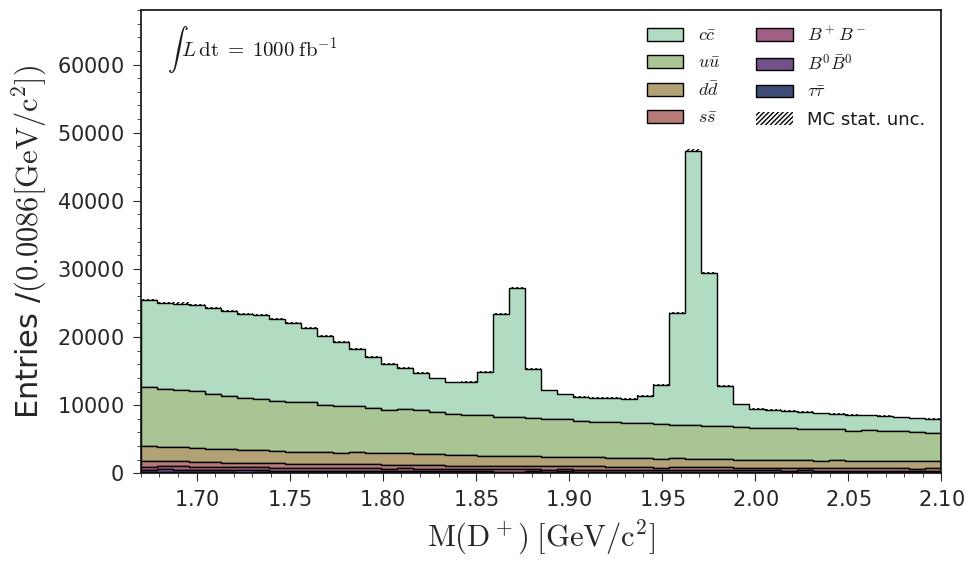

In [18]:

var = 'Dp_M'
data  = [pd_taupair[var], pd_mixed[var], pd_charged[var],pd_ssbar[var], pd_ddbar[var],pd_uubar[var], pd_ccbar[var]]  

xrange = (1.67,2.1)
nbins = 50
xlabel = "$\mathrm{M(D^+)}$"
# img_path = plot_directory + "/MC15ri_Dpetapip_pipi_pre_sel_DpM.png"
img_path = plot_directory + "/MC15ri_Dpetapip_pipi_tight_selv1_DpM.png"


MC_stack_plot(data, var, scale, xrange, nbins, xlabel=xlabel, labels=labels,title="", unit="[GeV/c^2]",luminosity=luminosity)
plt.tight_layout()
plt.ylim(0,68000)
plt.savefig(img_path)


[74833. 69246. 63442. 59119. 55093. 51609. 47694. 44780. 42061. 39454.
 36943. 34882. 32891. 30452. 28806. 27067. 25656. 23654. 22371. 20868.
 19633. 18024. 17141. 15892. 14831. 13581. 12802. 11551. 10581.  9594.
  8970.  8048.  7380.  6521.  5872.  5273.  4751.  4126.  3518.  3092.
  2555.  2308.  2040.  1643.  1283.  1046.   876.   671.   523.   453.]
fitst_bin_entries=74833.0


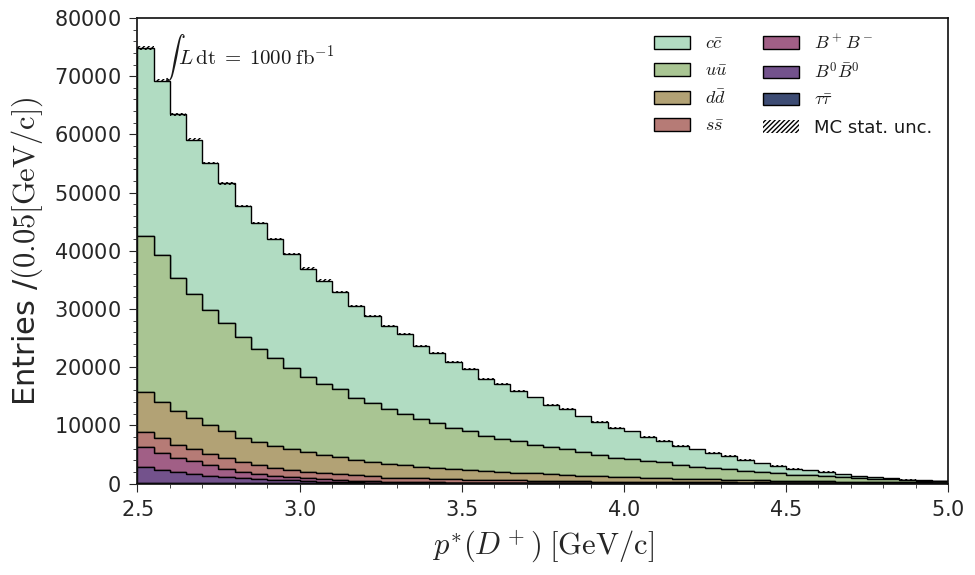

In [17]:
data  = [pd_taupair[var], pd_mixed[var], pd_charged[var],pd_ssbar[var], pd_ddbar[var],pd_uubar[var], pd_ccbar[var]]  

var = 'Dp_CMS_p'
xrange = (2.5,5)
nbins = 50
xlabel = "$p^{*}(D^+)$"
img_path = plot_directory + "/MC15ri_Dpetapip_pipi_pre_sel_DpCMSp.png"


MC_stack_plot(data, var, scale, xrange, nbins, xlabel=xlabel, labels=labels,title="", unit="[GeV/c]",luminosity=luminosity,force_range=xrange)
plt.tight_layout()

plt.savefig(img_path)


In [39]:
# var = 'Dp_cosAngleBetweenMomentumAndVertexVector'
# data  = [pd_taupair[var], pd_mixed[var], pd_charged[var],pd_ssbar[var], pd_ddbar[var],pd_uubar[var], pd_ccbar[var]]  

# xrange = (-1,1)
# nbins = 50
# xlabel = r"$D^{+}$ cosAngleBetweenMomentumAndVertexVector"
# img_path = plot_directory + "/MC15ri_Dpetapip_pipi_pre_sel_Dp_cosAngleBetweenMomentumAndVertexVector.png"


# MC_stack_plot(data, var, scale, xrange, nbins, xlabel=xlabel, labels=labels,title="", unit="",luminosity=luminosity,force_range=xrange)
# plt.tight_layout()

# plt.savefig(img_path)


[1.000000e+00 4.792200e+04 5.089770e+05 1.056383e+06 1.377894e+06
 1.564994e+06 1.683533e+06 1.758185e+06 1.793713e+06 1.809382e+06
 1.808042e+06 1.786767e+06 1.745085e+06 1.693771e+06 1.632289e+06
 1.561364e+06 1.484568e+06 1.405456e+06 1.318621e+06 1.236550e+06
 1.148952e+06 1.059392e+06 9.749580e+05 8.941410e+05 8.150450e+05
 7.406790e+05 6.689160e+05 6.025150e+05 5.351370e+05 4.732840e+05
 4.162190e+05 3.650060e+05 3.196140e+05 2.774860e+05 2.391630e+05
 2.043300e+05 1.736200e+05 1.460270e+05 1.231730e+05 1.039730e+05
 8.648900e+04 7.242700e+04 6.025100e+04 4.919200e+04 3.932100e+04
 3.107300e+04 2.296500e+04 1.582500e+04 9.268000e+03 2.981000e+03]
fitst_bin_entries=1.0


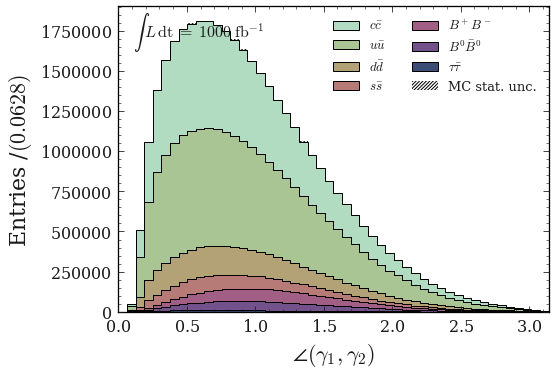

In [42]:
var = 'eta_Pi0_daughterAngle_0_1'
data  = [pd_taupair[var], pd_mixed[var], pd_charged[var],pd_ssbar[var], pd_ddbar[var],pd_uubar[var], pd_ccbar[var]]  

xrange = (0,math.pi)
nbins = 50
xlabel = r"$\angle (\gamma_1,\gamma_2)$"
img_path = plot_directory + "/MC15ri_Dpetapip_pipi_pre_sel_etapip_eta_Pi0_daughterAngle_0_1.png"


MC_stack_plot(data, var, scale, xrange, nbins, xlabel=xlabel, labels=labels,title="", unit="",luminosity=luminosity,force_range=xrange)
plt.tight_layout()

plt.savefig(img_path)

[ 238882.  243500.  249820.  261554.  278647.  297713.  322964.  353088.
  389454.  431950.  484047.  542206.  608194.  680305.  766284.  859753.
  969756. 1095360. 1232176. 1367233. 1485418. 1583186. 1640032. 1561021.
 1331445. 1328344. 1507886. 1552747. 1497872. 1419007. 1306772. 1182584.
 1052856.  933004.  832587.  745995.  664652.  593747.  530335.  475515.
  427082.  384636.  349162.  319566.  295472.  274887.  261202.  249627.
  244851.  240543.]
fitst_bin_entries=238882.0


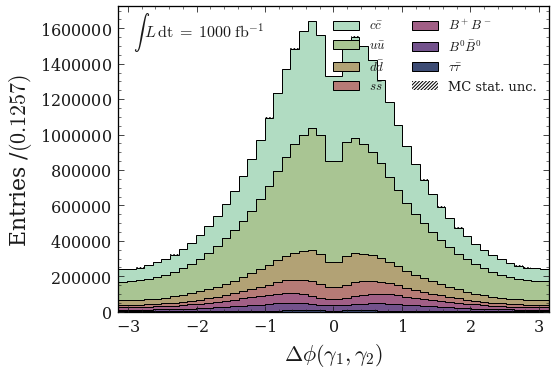

In [41]:
var = 'eta_Pi0_daughterDiffOfPhi_0_1'
data  = [pd_taupair[var], pd_mixed[var], pd_charged[var],pd_ssbar[var], pd_ddbar[var],pd_uubar[var], pd_ccbar[var]]  

xrange = (-math.pi,math.pi)
nbins = 50
xlabel = r"$\Delta \phi(\gamma_1,\gamma_2)$"
img_path = plot_directory + "/MC15ri_Dpetapip_pipi_pre_sel_etapip_eta_Pi0_daughterDiffOfPhi_0_1.png"


MC_stack_plot(data, var, scale, xrange, nbins, xlabel=xlabel, labels=labels,title="", unit="",luminosity=luminosity,force_range=xrange)
plt.tight_layout()

plt.savefig(img_path)

[       0.        0.        0.        0.        0.   341694.   332807.
   329075.   340097.   346788.   365727.   388191.   414187.   441755.
   464526.   486359.   524508.   554701.   574625.   618061.   587346.
   590743.   600300.   578588.   565838.   511730.   484074.   463048.
   443651.   425162.   410546.   393292.   366344.   340516.   323967.
   313281.   305459.   302655.   300689.   304074.   309525.   321201.
   338645.   365162.   410337.   478966.   594325.   812619.  2865993.
 16313742.]
fitst_bin_entries=0.0


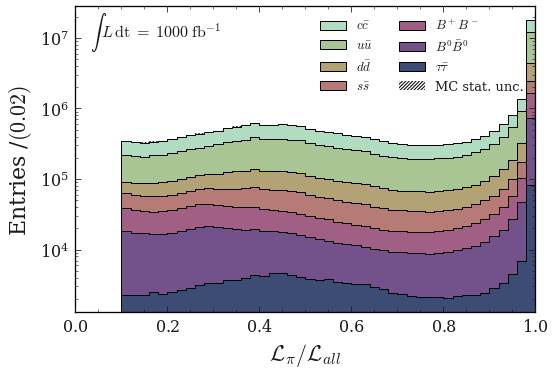

In [44]:
var = 'Pip_pionID'
data  = [pd_taupair[var], pd_mixed[var], pd_charged[var],pd_ssbar[var], pd_ddbar[var],pd_uubar[var], pd_ccbar[var]]  

xrange = (0,1)
nbins = 50
xlabel = r"$\mathcal{L}_{\pi}/\mathcal{L}_{all}$"
img_path = plot_directory + "/MC15ri_Dpetapip_pipi_pre_sel_etapip_Pip_pionID.png"


MC_stack_plot(data, var, scale, xrange, nbins, xlabel=xlabel, labels=labels,title="", unit="",luminosity=luminosity,force_range=xrange)
plt.yscale('log')

plt.tight_layout()

plt.savefig(img_path)

In [46]:
# var = 'Pip_pionIDNN'
# data  = [pd_taupair[var], pd_mixed[var], pd_charged[var],pd_ssbar[var], pd_ddbar[var],pd_uubar[var], pd_ccbar[var]]  

# xrange = (0,1)
# nbins = 50
# xlabel = r"DNN $\mathcal{L}_{\pi}/\mathcal{L}_{all}$"
# img_path = plot_directory + "/MC15ri_Dpetapip_pipi_pre_sel_etapip_Pip_pionIDNN.png"


# MC_stack_plot(data, var, scale, xrange, nbins, xlabel=xlabel, labels=labels,title="", unit="",luminosity=luminosity,force_range=xrange)
# plt.yscale('log')

# plt.tight_layout()

# plt.savefig(img_path)

[3.3170749e+07 1.4950830e+06 5.2260600e+05 3.0636000e+05 2.2146800e+05
 1.7483900e+05 1.4464300e+05 1.2350200e+05 1.0834600e+05 9.6502000e+04
 8.7617000e+04 8.0214000e+04 7.4180000e+04 6.8805000e+04 6.5352000e+04
 6.1164000e+04 5.8204000e+04 5.4707000e+04 5.3085000e+04 4.9504000e+04
 4.7946000e+04 4.6374000e+04 4.3897000e+04 4.2439000e+04 4.0994000e+04
 3.9115000e+04 3.7846000e+04 3.6357000e+04 3.5340000e+04 3.3807000e+04
 3.3484000e+04 3.1594000e+04 3.1192000e+04 3.0735000e+04 2.8993000e+04
 2.8455000e+04 2.8295000e+04 2.7082000e+04 2.6182000e+04 2.5737000e+04
 2.5317000e+04 2.4098000e+04 2.4301000e+04 2.3864000e+04 2.3137000e+04
 2.3094000e+04 2.2640000e+04 2.2556000e+04 2.2013000e+04 2.1105000e+04]
fitst_bin_entries=33170749.0


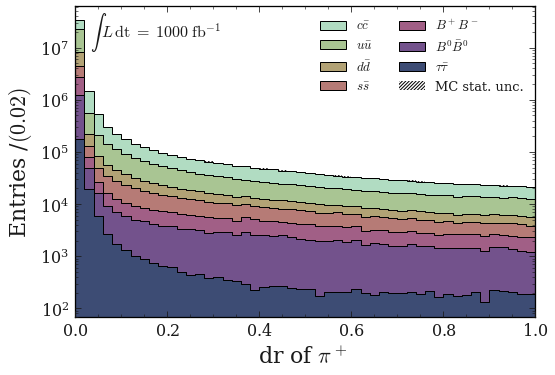

In [51]:
var = 'Pip_dr'
data  = [pd_taupair[var], pd_mixed[var], pd_charged[var],pd_ssbar[var], pd_ddbar[var],pd_uubar[var], pd_ccbar[var]]  

xrange = (0,1)
nbins = 50
xlabel = r"dr of $\pi^+$ "
img_path = plot_directory + "/MC15ri_Dpetapip_pipi_pre_sel_etapip_Pip_dr.png"


MC_stack_plot(data, var, scale, xrange, nbins, xlabel=xlabel, labels=labels,title="", unit="",luminosity=luminosity,force_range=xrange)
plt.yscale('log')

plt.tight_layout()

plt.savefig(img_path)

In [49]:
var = 'Pip_dz'
data  = [pd_taupair[var], pd_mixed[var], pd_charged[var],pd_ssbar[var], pd_ddbar[var],pd_uubar[var], pd_ccbar[var]]  

xrange = (-3,3)
nbins = 50
xlabel = r"dz of $\pi^+$"
img_path = plot_directory + "/MC15ri_Dpetapip_pipi_pre_sel_etapip_Pip_dz.png"


MC_stack_plot(data, var, scale, xrange, nbins, xlabel=xlabel, labels=labels,title="", unit="",luminosity=luminosity,force_range=xrange)
plt.yscale('log')

plt.tight_layout()

plt.savefig(img_path)

KeyError: 'Pip_dz'

In [38]:
pd_ccbar

,__experiment__,__run__,__event__,Dp_M,Dp_isSignal,Dp_CMS_p,etapip_Eta_M,etapip_Eta_isSignal,etapip_Eta_daughterDiffOfPhi_0_1,etapip_Eta_daughterAngle_0_1,...,eta_Pi0_daughterDiffOfPhi_0_1,eta_Pip_pionID,eta_Pim_pionID,eta_Pip_pionIDNN,eta_Pim_pionIDNN,eta_Pip_mcPDG,eta_Pim_mcPDG,Pip_pionID,Pip_mcPDG,Pip_dr
0,1003,0,39597571,1.739505,NaN,2.500390,0.539355,NaN,-0.334168,0.387020,...,-1.036867,1.000000,0.372755,1.000000,0.999937,211.0,-211.0,0.999838,-211.0,0.002138
1,1003,0,39597843,1.605385,0.0,2.840073,0.517964,0.0,0.088200,0.088210,...,1.180757,0.999997,0.999958,0.953778,0.990642,211.0,-211.0,0.835206,-211.0,0.981222
2,1003,0,39597843,1.665297,0.0,2.900674,0.517964,0.0,0.088200,0.088210,...,1.180757,0.999997,0.999958,0.953778,0.990642,211.0,-211.0,0.660983,-211.0,0.168197
3,1003,0,39597843,1.948129,0.0,2.881411,0.517964,0.0,0.088200,0.088210,...,1.180757,0.999997,0.999958,0.953778,0.990642,211.0,-211.0,0.988273,-211.0,0.148974
4,1003,0,39598195,2.082142,0.0,2.531889,0.548404,0.0,-0.994237,0.712364,...,-0.623936,0.990679,0.917305,0.999268,1.000000,211.0,-211.0,0.223845,-211.0,0.002318
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13004116,1003,0,172499417,1.736102,NaN,2.911517,0.546531,NaN,-0.585402,0.492618,...,1.683241,0.114848,0.452891,0.996791,1.000000,211.0,-211.0,0.213016,-321.0,0.003416
13004117,1003,0,172499659,1.816576,NaN,2.537393,0.562960,NaN,-0.005052,0.200479,...,-1.532427,0.906163,0.477166,0.999836,0.487852,211.0,-321.0,0.753038,211.0,0.338211
13004118,1003,0,172499659,1.821560,NaN,2.560320,0.559221,NaN,-0.005052,0.200479,...,-1.295670,0.906163,0.477166,0.999836,0.487852,211.0,-321.0,0.753038,211.0,0.338211
13004119,1003,0,172499770,1.983822,0.0,2.599950,0.540366,0.0,0.216980,0.300520,...,-0.260272,1.000000,0.999998,0.999772,1.000000,211.0,-211.0,0.989505,211.0,0.004771
